# Desription
This data about The Ultimate Halloween Candy Power Ranking which we should know if the candy is chocolate or not .
#### Content:
chocolate: Does it contain chocolate?

fruity: Is it fruit flavored?

caramel: Is there caramel in the candy?

peanutalmondy: Does it contain peanuts, peanut butter or almonds?

nougat: Does it contain nougat?

crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?

hard: Is it a hard candy?

bar: Is it a candy bar?

pluribus: Is it one of many candies in a bag or box?

sugarpercent: The percentile of sugar it falls under within the data set.

pricepercent: The unit price percentile compared to the rest of the set.

winpercent: The overall win percentage according to 269,000 matchups

# Agenda 
1- import Libraries

2- Load The Data

3- Handle Missing Values if existed

4- Make some visuaization 

5- Use the logisticRegression Algorithem

#### Import libraries

In [1]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')

#### Load the data

In [2]:
cand = pd.read_csv('datasets_3732_5912_candy-data.csv')
cand.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


#### shape of the data 

In [3]:
cand.shape 

(85, 13)

#### check the data if there are any messing values 

In [4]:
cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.4+ KB


#### describe the data to know the (ave , min , max , IQR , median)

In [5]:
cand.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


### show the number of 0 and 1 in each taste type

In [6]:
cand.chocolate.value_counts()

0    48
1    37
Name: chocolate, dtype: int64

In [7]:
cand.fruity.value_counts()

0    47
1    38
Name: fruity, dtype: int64

In [8]:
cand.caramel.value_counts()

0    71
1    14
Name: caramel, dtype: int64

In [9]:
cand.peanutyalmondy.value_counts()

0    71
1    14
Name: peanutyalmondy, dtype: int64

In [10]:
cand.nougat.value_counts()

0    78
1     7
Name: nougat, dtype: int64

In [11]:
cand.crispedricewafer.value_counts()

0    78
1     7
Name: crispedricewafer, dtype: int64

In [12]:
cand.hard.value_counts()

0    70
1    15
Name: hard, dtype: int64

In [13]:
cand.bar.value_counts()

0    64
1    21
Name: bar, dtype: int64

In [14]:
cand.pluribus.value_counts()

1    44
0    41
Name: pluribus, dtype: int64

#### make a boxplot between every taste type and winpercent

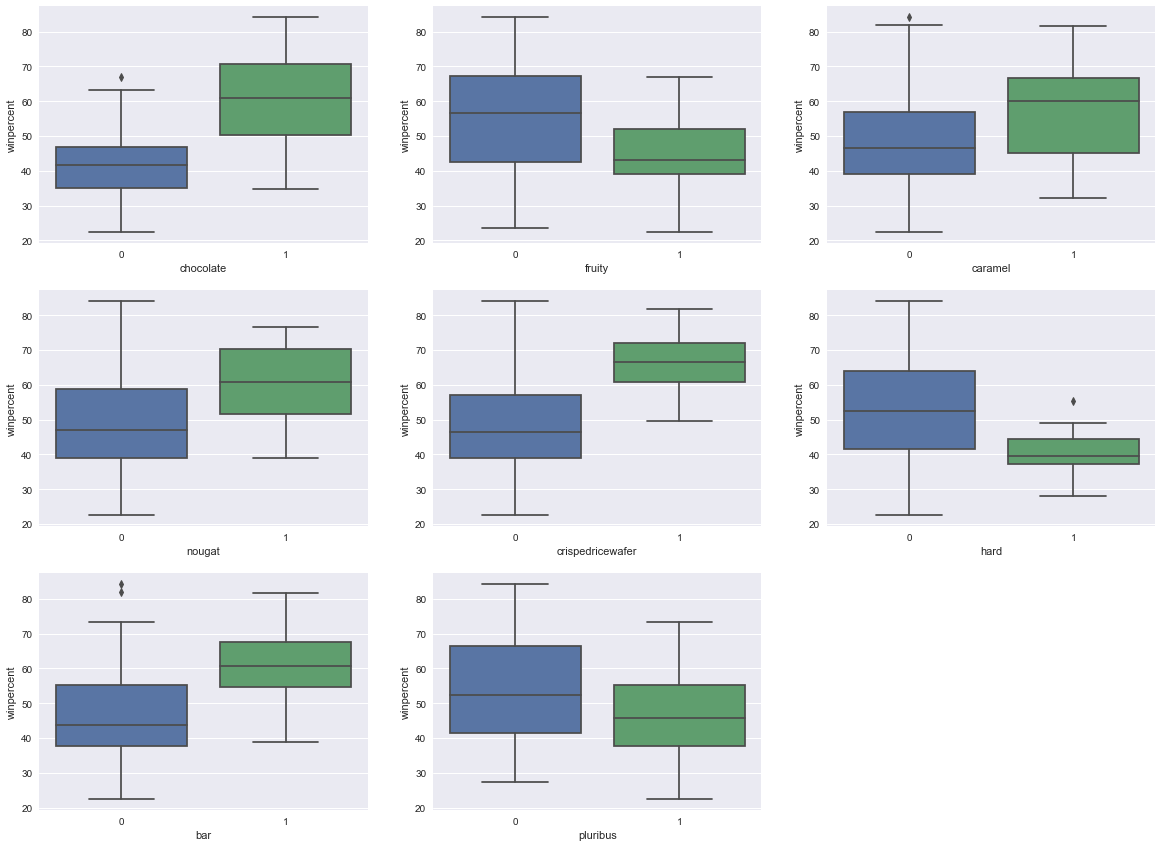

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.boxplot(x="chocolate" , y="winpercent" , data=cand)    
plt.subplot(4,3,2)
sns.boxplot(x="fruity" , y="winpercent" , data=cand) 
plt.subplot(4,3,3)
sns.boxplot(x="caramel" , y="winpercent" , data=cand) 
plt.subplot(4,3,4)
sns.boxplot(x="nougat" , y="winpercent" , data=cand) 
plt.subplot(4,3,5)
sns.boxplot(x="crispedricewafer" , y="winpercent" , data=cand) 
plt.subplot(4,3,6)
sns.boxplot(x="hard" , y="winpercent" , data=cand) 
plt.subplot(4,3,7)
sns.boxplot(x="bar" , y="winpercent" , data=cand) 
plt.subplot(4,3,8)
sns.boxplot(x="pluribus" , y="winpercent" , data=cand) 

#### show the histogam for pricepercent , sugarpercent and winpercent

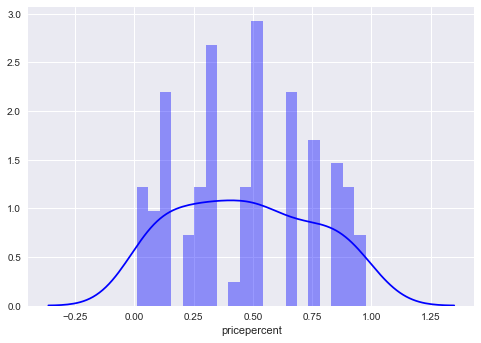

In [16]:
sns.distplot(cand.pricepercent, bins=20, color = 'blue')

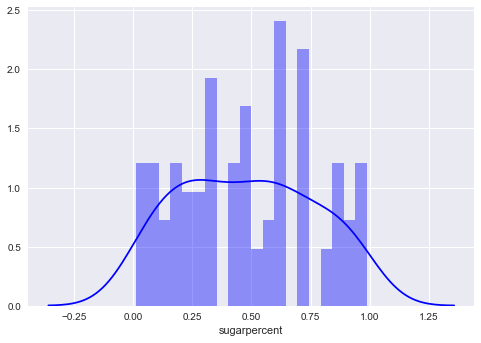

In [17]:
sns.distplot(cand.sugarpercent, bins=20, color = 'blue')

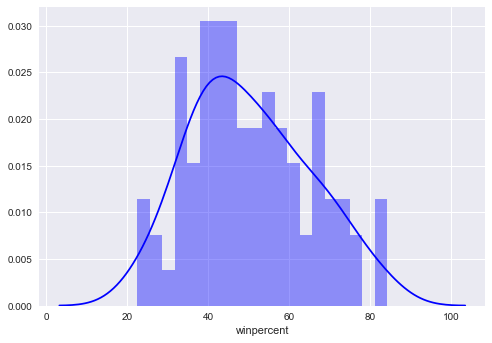

In [18]:
sns.distplot(cand.winpercent, bins=20, color = 'blue')

#### show the Competitors which are not chocolaty but winners

In [19]:
cand[cand['chocolate']==0].sort_values(by=['winpercent', 'sugarpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,55.354046
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


#### show Top 10 sugary candies

In [20]:
cand.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716


#### which candes is chocotate

In [21]:
cand[(cand['chocolate']==1)]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
24,HersheyÕs Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.490501
25,HersheyÕs Special Dark,1,0,0,0,0,0,0,1,0,0.430,0.918,59.236122
27,Junior Mints,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250


#### Drop the competitorname column

In [22]:
cand.drop("competitorname", inplace = True, axis=1)

#### heatmap for all data

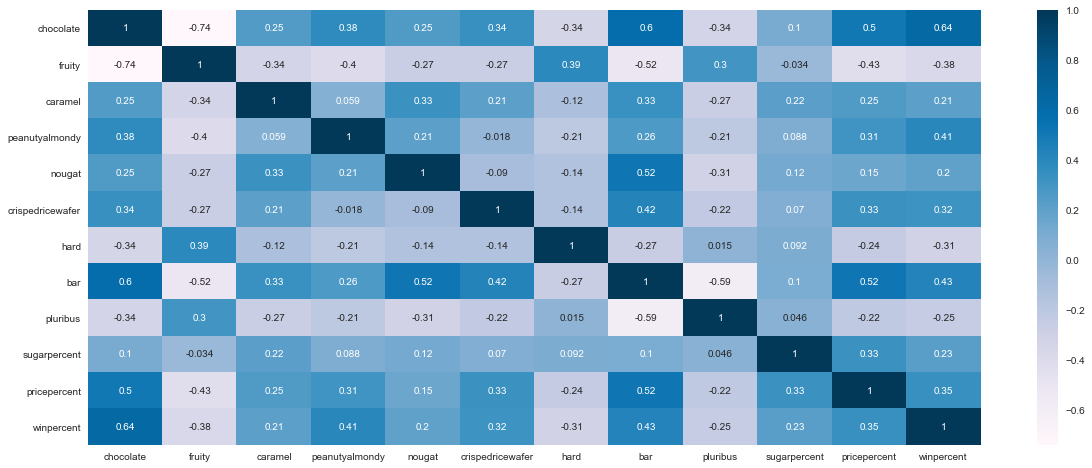

In [23]:
plt.figure(figsize = (20,8))        
sns.heatmap(cand.corr(),annot=True, cmap = 'PuBu')

#### Now we will use the LogisticRegression Algorithem to predict if the candy is chocolate or not

#### split the data into training and test set

In [24]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(cand, test_size=0.3)

#### prepare the data to enter the model

In [25]:
X_train=train.drop('chocolate',axis=1)
y_train=train[['chocolate']]
X_test=test.drop('chocolate',axis=1)
y_test=test[['chocolate']]

#### using logistic regression 

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\elsawah\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elsawah\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### predict the test

In [27]:
y_pred=lr.predict(X_test)

#### Using feature selection chi2

In [28]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 

In [29]:
chi2_feat = SelectKBest(chi2 , k=2)
Kbest = chi2_feat.fit_transform(X_train,y_train)

In [30]:
Kbest

array([[ 0.      , 71.46505 ],
       [ 1.      , 36.017628],
       [ 0.      , 70.735641],
       [ 1.      , 52.825947],
       [ 0.      , 81.866257],
       [ 1.      , 51.41243 ],
       [ 0.      , 73.43499 ],
       [ 0.      , 56.914547],
       [ 0.      , 32.230995],
       [ 0.      , 76.7686  ],
       [ 1.      , 42.849144],
       [ 1.      , 39.011898],
       [ 0.      , 84.18029 ],
       [ 1.      , 42.272076],
       [ 0.      , 32.261086],
       [ 0.      , 55.064072],
       [ 0.      , 29.703691],
       [ 0.      , 81.642914],
       [ 0.      , 69.483788],
       [ 0.      , 65.716286],
       [ 1.      , 39.4468  ],
       [ 0.      , 56.490501],
       [ 1.      , 34.517681],
       [ 0.      , 45.736748],
       [ 1.      , 55.103695],
       [ 0.      , 54.526451],
       [ 1.      , 37.348522],
       [ 0.      , 43.068897],
       [ 1.      , 43.088924],
       [ 1.      , 39.141056],
       [ 0.      , 76.673782],
       [ 0.      , 47.829754],
       [

#### get the coefficients

In [31]:
lr.coef_ 

array([[-2.22363095, -0.14843294,  0.08983432, -0.4487238 ,  0.48366011,
        -0.88245877,  0.42809722, -0.55976206, -0.43271024,  0.63329991,
         0.05328555]])

 #### get the intercept

In [32]:
lr.intercept_

array([-1.80075417])

#### get the accurecy of the model

In [33]:
lr.score(X_test,y_test)

0.8846153846153846

####  minimize a loss

In [34]:
from scipy.optimize import minimize 
minimize(np.square , 0).x

array([0.])

In [35]:
#mathimatical fun 
def log_loss(model):
    return np.log(1+np.exp(model))
def hing_loss(model):
    return np.maximum(0,1-model)


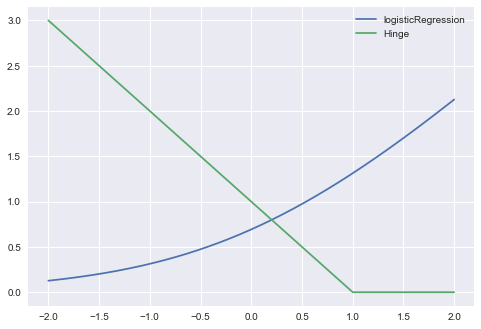

In [36]:
# creat gird of values and plot
gird = np.linspace(-2,2,1000)
plt.plot(gird , log_loss(gird),label='logisticRegression')
plt.plot(gird , hing_loss(gird) , label="Hinge")
plt.legend()
plt.show()

#### confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_pred)

In [38]:
c

array([[13,  1],
       [ 2, 10]], dtype=int64)

#### find maen squared error

In [39]:
from sklearn.metrics import mean_squared_error
MSE_lr=mean_squared_error(y_test,y_pred)

In [40]:
MSE_lr

0.11538461538461539

In [41]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))

#### find the precision , recall , F1-score

In [42]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.93      0.90        14\n           1       0.91      0.83      0.87        12\n\n    accuracy                           0.88        26\n   macro avg       0.89      0.88      0.88        26\nweighted avg       0.89      0.88      0.88        26\n'

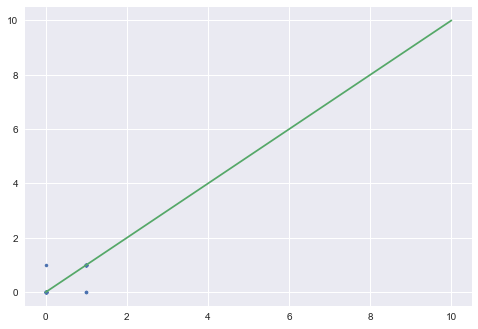

In [43]:
y_pred = lr.predict(X_test) 
plt.plot(y_test, y_pred, '.')

#plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 100)
y = x
plt.plot(x, y)
plt.show()